***

<center> <h1> US Census Data </h1> </center>

<center> <h2> Predicting whether the individual earns over $50k per year from the US Census dataset.</h2> </center>

***

### Name: Prashant Uttam Wakchaure 

***

In [39]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#feature splitting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#Basic Filter Methods
from sklearn.feature_selection import VarianceThreshold

#metric scores
from sklearn.metrics import roc_auc_score,balanced_accuracy_score, roc_curve, make_scorer, classification_report,confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, matthews_corrcoef, log_loss, auc
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.datasets import make_classification

#ML algorithm models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

#NEW ML MODELS
from sklearn.neural_network import MLPClassifier 

#feature selection algorithms
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#wrapper selection algorithms
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Imbalanced datasets
from imblearn.over_sampling import SMOTE

#hyperparameter tuning
from KUtils.classifier import generic_classifier_utils as gcu
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

#Ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Boosting
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [40]:
missing_values = ["n/a", "na", "--", "?", " ", " ?"]
us_126 = pd.read_csv('us_census_20200126.csv', na_values = missing_values)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [41]:
sns.heatmap(us_126.isnull(), cmap='viridis')

<AxesSubplot:>

In [42]:
us_126.columns = [c.lower().replace(' ', '') for c in us_126.columns]
us_126.columns = [c.replace("-",'_') for c in us_126.columns]

us_126['workclass'] = us_126['workclass'].str.strip()
us_126['education'] = us_126['education'].str.strip()
us_126['marital_status'] = us_126['marital_status'].str.strip()
us_126['occupation'] = us_126['occupation'].str.strip()
us_126['relationship'] = us_126['relationship'].str.strip()
us_126['race'] = us_126['race'].str.strip()
us_126['sex'] = us_126['sex'].str.strip()
us_126['native_country'] = us_126['native_country'].str.strip()
us_126['income_category'] = us_126['income_category'].str.strip()

us_org = us_126.copy()

In [43]:
us_126['workclass'].value_counts(dropna=False)

Private             2061
Self-emp-not-inc     244
Local-gov            190
NaN                  178
State-gov            135
Self-emp-inc          98
Federal-gov           93
Without-pay            1
Name: workclass, dtype: int64

In [44]:
us_126['occupation'].value_counts(dropna=False)

Prof-specialty       397
Exec-managerial      369
Craft-repair         364
Adm-clerical         331
Sales                327
Other-service        315
Machine-op-inspct    190
NaN                  178
Transport-moving     161
Handlers-cleaners    129
Tech-support          85
Farming-fishing       83
Protective-serv       54
Priv-house-serv       16
Armed-Forces           1
Name: occupation, dtype: int64

In [45]:
us_126['native_country'].value_counts(dropna=False)

United-States         2703
Mexico                  63
NaN                     46
Philippines             16
India                   14
Canada                  11
Puerto-Rico             11
Japan                   10
Jamaica                  9
England                  8
South                    8
China                    7
Poland                   7
Vietnam                  7
Cuba                     6
Columbia                 6
Dominican-Republic       6
El-Salvador              6
Italy                    5
Germany                  5
Portugal                 4
Guatemala                4
Iran                     4
Ireland                  4
Thailand                 3
Peru                     3
Haiti                    3
France                   3
Greece                   3
Yugoslavia               3
Laos                     2
Ecuador                  2
Nicaragua                2
Cambodia                 2
Scotland                 1
Honduras                 1
Trinadad&Tobago          1
H

In [46]:
us_126.isnull().sum()

age                  0
workclass          178
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation         178
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country      46
income_category      0
dtype: int64

In [47]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
us_126 = DataFrameImputer().fit_transform(us_126)

In [48]:
us_126.to_csv("us_126.csv")

In [49]:
us_126['workclass'].value_counts(dropna=False)

Private             2239
Self-emp-not-inc     244
Local-gov            190
State-gov            135
Self-emp-inc          98
Federal-gov           93
Without-pay            1
Name: workclass, dtype: int64

In [50]:
us_126['occupation'].value_counts(dropna=False)

Prof-specialty       575
Exec-managerial      369
Craft-repair         364
Adm-clerical         331
Sales                327
Other-service        315
Machine-op-inspct    190
Transport-moving     161
Handlers-cleaners    129
Tech-support          85
Farming-fishing       83
Protective-serv       54
Priv-house-serv       16
Armed-Forces           1
Name: occupation, dtype: int64

In [51]:
us_126['native_country'].value_counts(dropna=False)

United-States         2749
Mexico                  63
Philippines             16
India                   14
Canada                  11
Puerto-Rico             11
Japan                   10
Jamaica                  9
South                    8
England                  8
China                    7
Vietnam                  7
Poland                   7
Columbia                 6
El-Salvador              6
Cuba                     6
Dominican-Republic       6
Germany                  5
Italy                    5
Ireland                  4
Portugal                 4
Iran                     4
Guatemala                4
Peru                     3
Haiti                    3
France                   3
Greece                   3
Yugoslavia               3
Thailand                 3
Laos                     2
Ecuador                  2
Nicaragua                2
Cambodia                 2
Scotland                 1
Honduras                 1
Hong                     1
Trinadad&Tobago          1
N

In [52]:
us_126.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
education_num      0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income_category    0
dtype: int64

<AxesSubplot:>

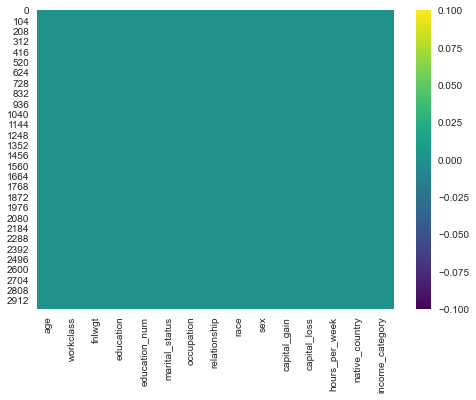

In [53]:
sns.heatmap(us_126.isnull(), cmap='viridis')

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(us_126.corr(), cmap="viridis",annot=True)
plt.show()

In [55]:
us = us_126.copy()

In [38]:
#Ordinal Encoding
categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship','race', 'sex','native_country', 'income_category']
for feature in categorical:
        le = preprocessing.OrdinalEncoder()
        us[feature] = le.fit_transform(us[[feature]])

In [668]:
us

age  workclass   fnlwgt  education  education_num  marital_status  \
0      51        2.0   243361       15.0             10             6.0   
1      38        2.0   203761        8.0             11             4.0   
2      47        2.0   287480       15.0             10             2.0   
3      35        2.0   269300       11.0              9             5.0   
4      23        2.0   133582        3.0              2             4.0   
5      32        2.0   235124       15.0             10             2.0   
6      20        2.0   183594       15.0             10             4.0   
7      44        2.0   317535        3.0              2             2.0   
8      59        3.0   349910        7.0             12             2.0   
9      37        4.0    29814       11.0              9             4.0   
10     35        2.0   265954        9.0             13             4.0   
11     24        2.0   258700        4.0              3             4.0   
12     53        5.0   281590       11.0              9             2.0   
13     31        2.0   213750       15.0             10             4.0   
14     27        2.0   107812        9.0             13             2.0   
15     39        2.0   174330       11.0              9             5.0   
16     38        4.0    89202       15.0             10             0.0   
17     17        2.0   166290        6.0              5             4.0   
18     19        2.0   225775       15.0             10             4.0   
19     27        2.0   205188        0.0              6             2.0   
20     47        2.0   147236       11.0              9             2.0   
21     40        2.0   105936       11.0              9             3.0   
22     30        5.0   158291        9.0             13             4.0   
23     53        2.0   320510        0.0              6             0.0   
24     63        3.0   267101        9.0             13             2.0   
25     21        1.0   102942       15.0             10             4.0   
26     24        2.0   464103       11.0              9             4.0   
27     36        2.0   192664        1.0              7             4.0   
28     39        2.0    38312       15.0             10             3.0   
29     43        2.0    58447       10.0             16             2.0   
30     39        2.0   179668        9.0             13             2.0   
31     45        4.0    34446       11.0              9             2.0   
32     45        2.0   101452       12.0             14             2.0   
33     33        2.0   268571       15.0             10             2.0   
34     42        2.0    54202        9.0             13             4.0   
35     36        2.0    99872       11.0              9             2.0   
36     19        2.0   246226       11.0              9             4.0   
37     48        3.0    88564       15.0             10             0.0   
38     22        2.0   175883       11.0              9             4.0   
39     35        2.0   125933        9.0             13             2.0   
40     24        2.0   211345       15.0             10             4.0   
41     47        3.0   168191       15.0             10             2.0   
42     37        2.0   409189       15.0             10             2.0   
43     73        5.0    74040        5.0              4             0.0   
44     25        2.0    51498        2.0              8             4.0   
45     60        2.0   386261        9.0             13             3.0   
46     30        1.0   131776       12.0             14             4.0   
47     37        2.0    32668        9.0             13             2.0   
48     41        2.0    66118        9.0             13             0.0   
49     31        2.0   164870        1.0              7             2.0   
50     27        2.0   391468        1.0              7             0.0   
51     34        2.0    37646        7.0             12             2.0   
52     18        2.0   157131  

In [56]:
#Label Encoding
categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship','race', 'sex','native_country', 'income_category']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        us_126[feature] = le.fit_transform(us_126[feature])

In [57]:
us_126

age  workclass   fnlwgt  education  education_num  marital_status  \
0      51          2   243361         15             10               6   
1      38          2   203761          8             11               4   
2      47          2   287480         15             10               2   
3      35          2   269300         11              9               5   
4      23          2   133582          3              2               4   
5      32          2   235124         15             10               2   
6      20          2   183594         15             10               4   
7      44          2   317535          3              2               2   
8      59          3   349910          7             12               2   
9      37          4    29814         11              9               4   
10     35          2   265954          9             13               4   
11     24          2   258700          4              3               4   
12     53          5   281590         11              9               2   
13     31          2   213750         15             10               4   
14     27          2   107812          9             13               2   
15     39          2   174330         11              9               5   
16     38          4    89202         15             10               0   
17     17          2   166290          6              5               4   
18     19          2   225775         15             10               4   
19     27          2   205188          0              6               2   
20     47          2   147236         11              9               2   
21     40          2   105936         11              9               3   
22     30          5   158291          9             13               4   
23     53          2   320510          0              6               0   
24     63          3   267101          9             13               2   
25     21          1   102942         15             10               4   
26     24          2   464103         11              9               4   
27     36          2   192664          1              7               4   
28     39          2    38312         15             10               3   
29     43          2    58447         10             16               2   
30     39          2   179668          9             13               2   
31     45          4    34446         11              9               2   
32     45          2   101452         12             14               2   
33     33          2   268571         15             10               2   
34     42          2    54202          9             13               4   
35     36          2    99872         11              9               2   
36     19          2   246226         11              9               4   
37     48          3    88564         15             10               0   
38     22          2   175883         11              9               4   
39     35          2   125933          9             13               2   
40     24          2   211345         15             10               4   
41     47          3   168191         15             10               2   
42     37          2   409189         15             10               2   
43     73          5    74040          5              4               0   
44     25          2    51498          2              8               4   
45     60          2   386261          9             13               3   
46     30          1   131776         12             14               4   
47     37          2    32668          9             13               2   
48     41          2    66118          9             13               0   
49     31          2   164870          1              7               2   
50     27          2   391468          1              7               0   
51     34          2    37646          7             12               2   
52     18          2   157131  

In [58]:
us = us_126.copy()

us.drop(labels=['fnlwgt','marital_status','relationship'], axis=1, inplace =True)

X = us.drop(labels=['income_category'], axis=1)
Y = us['income_category']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.35,random_state=0)


In [59]:
# separate dataset into train and test
X = us_126.drop(labels=['income_category'], axis=1)
Y = us_126['income_category']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.35,random_state=0)


#Creating copies
X_train_org=X_train.copy()
X_test_org=X_test.copy()

In [60]:
X_train.shape

(1950, 14)

In [61]:
Y_train.shape

(1950,)

In [62]:
X_test.shape

(1050, 14)

In [63]:
Y_test.shape

(1050,)

In [64]:
Y_train

964     0
1473    0
286     0
2748    1
97      0
2784    1
2938    0
2656    0
795     0
1174    1
285     1
557     0
2491    0
2959    0
1515    0
926     1
133     1
2812    0
1893    0
602     0
1773    0
1887    0
2792    0
949     0
1935    0
996     0
2914    1
11      0
1311    0
1733    0
442     1
2861    0
157     0
2313    0
505     1
1239    0
1736    0
18      0
1370    0
200     0
646     0
2750    0
2777    0
47      1
1553    0
2112    0
2566    0
1760    0
1420    0
2611    0
1651    0
1914    0
897     0
1062    0
657     0
2593    0
1225    0
2462    0
1010    1
1452    0
413     0
1976    0
254     0
2266    1
2309    0
684     0
300     0
128     0
1054    1
1347    0
1362    0
2010    0
846     1
1606    1
386     1
651     0
2258    0
805     0
2983    0
366     0
2367    0
2294    0
2924    0
1857    1
2674    0
1257    0
2859    0
458     1
1012    0
1366    0
2746    0
1030    1
1737    0
87      0
2626    0
1328    0
1756    1
1018    0
1850    1
1859    1


In [65]:
X_test

age  workclass   fnlwgt  education  education_num  marital_status  \
311    45          2   129387          7             12               0   
1025   23          0   314525          9             13               4   
1587   26          2   285004          9             13               4   
2941   47          2   329144         11              9               2   
2980   30          2   280927          9             13               4   
2078   49          2   305657          5              4               2   
2281   63          2   161563         11              9               2   
720    50          2    38310          5              4               0   
1537   50          1   320386          7             12               0   
2493   43          2   214781         12             14               2   
1716   20          2   158206         15             10               4   
536    51          2    86332          8             11               2   
298    48          4    32825         11              9               2   
104    42          4    89942         15             10               2   
1649   43          2   307767         11              9               2   
2299   41          1   144995         12             14               2   
1109   34          2   164280          0              6               2   
899    68          2    76371         11              9               2   
461    50          2   172052         11              9               2   
2590   31          1   209103         15             10               2   
2664   66          2   186032          8             11               6   
983    58          2   172618         14             15               2   
1191   41          5   108945         11              9               4   
1003   34          2   245173         11              9               0   
2692   28          2   140845          0              6               4   
463    18          2    40822          1              7               4   
1108   34          2   141118          9             13               3   
305    50          3   219420         11              9               2   
1014   18          2   210311         11              9               4   
22     30          5   158291          9             13               4   
2770   90          0   195433         11              9               2   
1768   57          4   275943          5              4               2   
2277   34          2   375680          7             12               4   
1027   23          2   275818         15             10               4   
1476   38          2    71701          8             11               4   
762    66          2   236879         13              1               6   
30     39          2   179668          9             13               2   
1464   28          2   195573         11              9               2   
2132   19          1   169853         11              9               4   
1788   55          2   249072         11              9               2   
1410   56          2   100776         11              9               2   
977    20          2   194504         15             10               5   
961    33          1   256529         11              9               5   
306    46          2   197731          8             11               3   
569    33          2   184784          0              6               0   
156    35          2    77146          9             13               2   
2850   59          5   398626         10             16               0   
1244   28          2   291374          0              6               4   
2126   59          4   199240         11              9               0   
599    32          2   113688          8             11               0   
1351   33          2   345360         15             10               4   
1230   65          2   115890          9             13               2   
638    23          2   167868  

In [66]:
scaler = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [706]:
X_train.mean(axis=0)

age               3.230881e-17
workclass        -1.860945e-16
fnlwgt            5.244482e-17
education         6.391713e-17
education_num    -1.618282e-16
marital_status    8.665026e-17
occupation        1.211200e-16
relationship     -3.219647e-17
race              6.655523e-16
sex              -3.329612e-16
capital_gain      1.840856e-16
capital_loss      4.284668e-16
hours_per_week    1.799619e-16
native_country    2.503817e-16
dtype: float64

In [62]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(
    X, Y,
    cv_folds=10, 
    hyper_parameter_name='min_samples_leaf',
    hyper_parameter_range = range(3, 21, 3),
    model_scoring = {'F1': make_scorer(f1_score),
                     'AUC': make_scorer(roc_auc_score),
                     'Accuracy': make_scorer(accuracy_score),
                     'Kappa': make_scorer(cohen_kappa_score),
                     'BAS': make_scorer(balanced_accuracy_score),
                    },
    refit='Kappa',
    classifier_algo=DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=11, max_features=12))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 279, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameter

ValueError: max_features must be in (0, n_features]

In [67]:
#Decision Tree Classifier - FOR Q1.
dtc = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = list(range(1, 54))
max_depth = list(range(2, 15)) 
min_samples_leaf = list(range(1, 30))

param_grid = dict(criterion=criterion, splitter= splitter, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

rs_dtc = RandomizedSearchCV(dtc, param_grid, n_jobs = -1,verbose=1, cv=10,random_state=0, n_iter=100, scoring='accuracy')
rs_dtc.fit(X_train, Y_train)
y_pred_dtc = rs_dtc.predict(X_test)
print(rs_dtc.best_score_, rs_dtc.best_params_)
print(rs_dtc.best_estimator_)

print("\nF1 SCORE: DTC",f1_score(Y_test, y_pred_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_dtc))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s


0.8374358974358973 {'splitter': 'best', 'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 6, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=7,
                       min_samples_leaf=8)

F1 SCORE: DTC 0.6217391304347827
Cohen Kappa: DTC 0.5158982511923689
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       810
           1       0.65      0.60      0.62       240

    accuracy                           0.83      1050
   macro avg       0.77      0.75      0.76      1050
weighted avg       0.83      0.83      0.83      1050

MCC: DTC 0.5166987833866412
Accuracy: DTC 0.8342857142857143
BAC: DTC 0.7503858024691358
ROC-AUC: DTC 0.7503858024691358
CF: DTC 
 [[733  77]
 [ 97 143]]


[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.9s finished


In [68]:
#NN - FOR Q1.
mlp = MLPClassifier(random_state=0, max_iter=1000)

grid2 = [{'alpha': [1, 10, 100, 1000],
         'hidden_layer_sizes': [[10], [50], [100], [150]]}]

rs_mlp = RandomizedSearchCV(mlp, grid2, n_jobs = -1,verbose=1, cv=10, random_state=0, n_iter=100, scoring='f1')
rs_mlp.fit(X_train, Y_train)
y_pred_NN = rs_mlp.predict(X_test)
print(rs_mlp.best_score_, rs_mlp.best_params_)
print(rs_mlp.best_estimator_)

print("\nF1 SCORE: NN",f1_score(Y_test, y_pred_NN))
print("Cohen Kappa: NN",cohen_kappa_score(Y_test, y_pred_NN))
print("CR Report: NN \n",classification_report(Y_test, y_pred_NN))
print("MCC: NN",matthews_corrcoef(Y_test, y_pred_NN))
print("Accuracy: NN",accuracy_score(Y_test, y_pred_NN))
print("BAC: NN",balanced_accuracy_score(Y_test, y_pred_NN))
print("ROC-AUC: NN",roc_auc_score(Y_test, y_pred_NN))
print("CF: NN \n",confusion_matrix(Y_test, y_pred_NN))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   47.1s finished


0.6590655581661258 {'hidden_layer_sizes': [150], 'alpha': 1}
MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)

F1 SCORE: NN 0.6182669789227168
Cohen Kappa: NN 0.5227139630218356
CR Report: NN 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       810
           1       0.71      0.55      0.62       240

    accuracy                           0.84      1050
   macro avg       0.79      0.74      0.76      1050
weighted avg       0.84      0.84      0.84      1050

MCC: NN 0.5291245943144813
Accuracy: NN 0.8447619047619047
BAC: NN 0.7410493827160494
ROC-AUC: NN 0.7410493827160494
CF: NN 
 [[755  55]
 [108 132]]


In [69]:
#1-KNN - FOR Q1.

k = list(range(1,31))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = list(range(1,31))
knn1 = KNeighborsClassifier(n_neighbors=1)

param_grid = dict(weights=weight_options, p = p, algorithm=algorithm)

rs_knn1 = RandomizedSearchCV(knn1 , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')

rs_knn1.fit(X_train , Y_train)

y_pred_KNN1 = rs_knn1.predict(X_test)
print(rs_knn1.best_score_, rs_knn1.best_params_)
print(rs_knn1.best_estimator_)

print("\nF1 SCORE: KNN",f1_score(Y_test, y_pred_KNN1))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_test, y_pred_KNN1))
print("CR Report: KNN \n",classification_report(Y_test, y_pred_KNN1))
print("MCC: KNN",matthews_corrcoef(Y_test, y_pred_KNN1))
print("Accuracy: KNN",accuracy_score(Y_test, y_pred_KNN1))
print("BAC: KNN",balanced_accuracy_score(Y_test, y_pred_KNN1))
print("ROC-AUC: KNN",roc_auc_score(Y_test, y_pred_KNN1))
print("CF: KNN \n",confusion_matrix(Y_test, y_pred_KNN1))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 985 out of 1000 | elapsed:   20.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.1s finished


0.60285252868298 {'weights': 'uniform', 'p': 3, 'algorithm': 'brute'}
KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3)

F1 SCORE: KNN 0.5466101694915254
Cohen Kappa: KNN 0.41520924422236094
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       810
           1       0.56      0.54      0.55       240

    accuracy                           0.80      1050
   macro avg       0.71      0.71      0.71      1050
weighted avg       0.79      0.80      0.79      1050

MCC: KNN 0.4153084977943353
Accuracy: KNN 0.7961904761904762
BAC: KNN 0.7051697530864197
ROC-AUC: KNN 0.7051697530864198
CF: KNN 
 [[707 103]
 [111 129]]


In [70]:
#KNN - FOR Q1.

k = list(range(1,31))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = list(range(1,31))
knn = KNeighborsClassifier()

param_grid = dict(weights=weight_options, p = p, algorithm=algorithm, n_neighbors=k)

rs_knn = RandomizedSearchCV(knn , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')

rs_knn.fit(X_train , Y_train)

y_pred_KNN = rs_knn.predict(X_test)
print(rs_knn.best_score_, rs_knn.best_params_)
print(rs_knn.best_estimator_)

print("\nF1 SCORE: KNN",f1_score(Y_test, y_pred_KNN))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_test, y_pred_KNN))
print("CR Report: KNN \n",classification_report(Y_test, y_pred_KNN))
print("MCC: KNN",matthews_corrcoef(Y_test, y_pred_KNN))
print("Accuracy: KNN",accuracy_score(Y_test, y_pred_KNN))
print("BAC: KNN",balanced_accuracy_score(Y_test, y_pred_KNN))
print("ROC-AUC: KNN",roc_auc_score(Y_test, y_pred_KNN))
print("CF: KNN \n",confusion_matrix(Y_test, y_pred_KNN))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   23.7s finished


0.6045205509946696 {'weights': 'distance', 'p': 19, 'n_neighbors': 4, 'algorithm': 'auto'}
KNeighborsClassifier(n_neighbors=4, p=19, weights='distance')

F1 SCORE: KNN 0.5398230088495575
Cohen Kappa: KNN 0.41422594142259417
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       810
           1       0.58      0.51      0.54       240

    accuracy                           0.80      1050
   macro avg       0.72      0.70      0.71      1050
weighted avg       0.79      0.80      0.80      1050

MCC: KNN 0.41551980379343056
Accuracy: KNN 0.8019047619047619
BAC: KNN 0.6986111111111111
ROC-AUC: KNN 0.6986111111111111
CF: KNN 
 [[720  90]
 [118 122]]


In [71]:
#Calling remaining classification algorithms

dt= DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=11, max_features=12,
                       min_samples_leaf=2)

knn1 = KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3)

knn = KNeighborsClassifier(n_neighbors=4, p=19, weights='distance')

mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)


	 	 	 	 	 	 	 Decision Tree
Confusion Matrix - Train 
 [[1411   77]
 [  98  364]]
Overall Accuracy - Train  0.9102564102564102
AUC - Train:  0.9695827805706837


Confusion Matrix - Test  
 [[707 103]
 [ 96 144]]
Classification report - Test  
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       810
           1       0.58      0.60      0.59       240

    accuracy                           0.81      1050
   macro avg       0.73      0.74      0.73      1050
weighted avg       0.81      0.81      0.81      1050

Cross-validation scores on F1 
 0.6271562189099169
Overall Accuracy - Test  0.8104761904761905
AUC - Test:  0.8132510288065844
F1 score - Test:  0.591375770020534
Cohen Kappa score - Test:  0.46803635530436116
Balanced accuracy score - Test:  0.7364197530864197
MCC score - Test:  0.46811831823819927


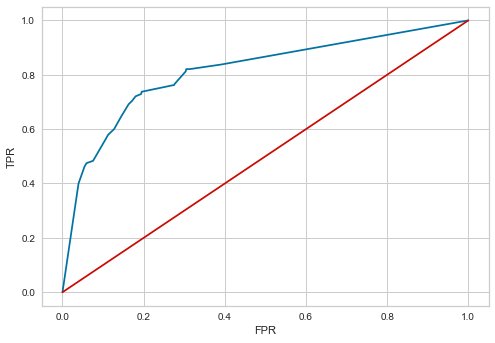

	 	 	 	 	 	 	 KNN
Confusion Matrix - Train 
 [[1488    0]
 [   0  462]]
Overall Accuracy - Train  1.0
AUC - Train:  1.0


Confusion Matrix - Test  
 [[720  90]
 [118 122]]
Classification report - Test  
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       810
           1       0.58      0.51      0.54       240

    accuracy                           0.80      1050
   macro avg       0.72      0.70      0.71      1050
weighted avg       0.79      0.80      0.80      1050

Cross-validation scores on F1 
 0.35691671320527074
Overall Accuracy - Test  0.8019047619047619
AUC - Test:  0.7867772633744856
F1 score - Test:  0.5398230088495575
Cohen Kappa score - Test:  0.41422594142259417
Balanced accuracy score - Test:  0.6986111111111111
MCC score - Test:  0.41551980379343056


	 	 	 	 	 	 	 1-NN
Confusion Matrix - Train 
 [[1488    0]
 [   0  462]]
Overall Accuracy - Train  1.0
AUC - Train:  1.0


Confusion Matrix - Test  
 [[707 103]
 [111 129]]
Classification report - Test  
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       810
           1       0.56      0.54      0.55       240

    accuracy                           0.80      1050
   macro avg       0.71      0.71      0.71      1050
weighted avg       0.79      0.80      0.79      1050

Cross-validation scores on F1 
 0.37451901591043224
Overall Accuracy - Test  0.7961904761904762
AUC - Test:  0.7051697530864198
F1 score - Test:  0.5466101694915254
Cohen Kappa score - Test:  0.41520924422236094
Balanced accuracy score - Test:  0.7051697530864197
MCC score - Test:  0.4153084977943353


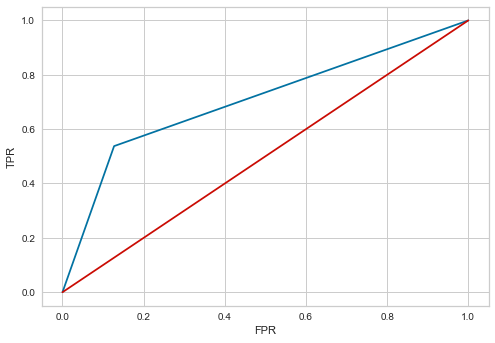

	 	 	 	 	 	 	 Neural Network
Confusion Matrix - Train 
 [[1411   77]
 [ 170  292]]
Overall Accuracy - Train  0.8733333333333333
AUC - Train:  0.930730112181725


Confusion Matrix - Test  
 [[755  55]
 [108 132]]
Classification report - Test  
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       810
           1       0.71      0.55      0.62       240

    accuracy                           0.84      1050
   macro avg       0.79      0.74      0.76      1050
weighted avg       0.84      0.84      0.84      1050

Cross-validation scores on F1 
 0.313460839658663
Overall Accuracy - Test  0.8447619047619047
AUC - Test:  0.8813323045267489
F1 score - Test:  0.6182669789227168
Cohen Kappa score - Test:  0.5227139630218356
Balanced accuracy score - Test:  0.7410493827160494
MCC score - Test:  0.5291245943144813


In [72]:
algo_arr = [dt, knn , knn1, mlp]

l={0:'Decision Tree', 1:'KNN' , 2:'1-NN', 3:'Neural Network'}
metric=[]
    
for i in range(len(algo_arr)):
    algo_arr[i].fit(X_train , Y_train)

    y_train_pred=algo_arr[i].predict(X_train)
    y_train_prob=algo_arr[i].predict_proba(X_train)[:,1]
    
    cv_scores = cross_val_score(algo_arr[i], X, Y, cv=10, scoring="f1")
    
    print('\t','\t','\t','\t','\t','\t','\t',l[i])
    print('Confusion Matrix - Train' , '\n' , confusion_matrix(Y_train,y_train_pred))

    print('Overall Accuracy - Train ', accuracy_score(Y_train,y_train_pred))
    metric.append(accuracy_score(Y_train,y_train_pred))

    print('AUC - Train: ', roc_auc_score(Y_train,y_train_prob))
    metric.append(roc_auc_score(Y_train,y_train_prob))

    print('\n')

    y_test_pred = algo_arr[i].predict(X_test)
    y_test_prob=algo_arr[i].predict_proba(X_test)[:,1]

    print('Confusion Matrix - Test ', '\n' , confusion_matrix(Y_test,y_test_pred))
    
    print('Classification report - Test ', '\n' , classification_report(Y_test,y_test_pred))
    
    print('Cross-validation scores on F1' , '\n' , cv_scores.mean())

    print('Overall Accuracy - Test ', accuracy_score(Y_test,y_test_pred))
    metric.append(accuracy_score(Y_test,y_test_pred))

    print('AUC - Test: ', roc_auc_score(Y_test,y_test_prob))
    metric.append(roc_auc_score(Y_test,y_test_prob))
    
    print('F1 score - Test: ', f1_score(Y_test,y_test_pred))
    metric.append(f1_score(Y_test,y_test_pred))
    
    print('Cohen Kappa score - Test: ', cohen_kappa_score(Y_test,y_test_pred))
    metric.append(cohen_kappa_score(Y_test,y_test_pred))
    
    print('Balanced accuracy score - Test: ', balanced_accuracy_score(Y_test,y_test_pred))
    metric.append(balanced_accuracy_score(Y_test,y_test_pred))
    
    print("MCC score - Test: ",matthews_corrcoef(Y_test, y_test_pred))
    metric.append(matthews_corrcoef(Y_test,y_test_pred))
    
    #ROC AUC Curve
    fpr , tpr , threshold = roc_curve(Y_test , y_test_prob)
    plt.plot(fpr , tpr)
    plt.plot(fpr , fpr , 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

<h1>SMOTE</h1>

In [83]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X, Y)

In [84]:
y_train_SMOTE.value_counts()

1    2298
0    2298
Name: income_category, dtype: int64

In [85]:
X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(X_train_SMOTE,y_train_SMOTE,test_size=0.3,random_state=0)

scaler = StandardScaler().fit(X_trainS)

X_trainS = pd.DataFrame(scaler.transform(X_trainS), columns = X.columns)

X_testS = pd.DataFrame(scaler.transform(X_testS), columns = X.columns)

In [77]:
X_trainS

age  workclass  education  education_num  occupation      race  \
0     0.528499   0.916690   1.299872      -0.243923    0.199812  0.375102   
1     0.528499  -1.239006   1.012550      -0.243923    1.250988  0.375102   
2    -0.594104  -1.239006   0.150583      -0.643871   -1.114158  0.375102   
3    -0.112988  -1.239006  -0.424062       0.955923   -1.639746  0.375102   
4    -0.834662  -0.161158   1.299872      -0.243923    0.725400  0.375102   
5    -0.193174   0.916690   0.150583       1.355872   -0.588570  0.375102   
6    -0.353546  -0.161158  -0.424062       0.955923    0.725400  0.375102   
7     0.368128   1.994539   0.150583       1.755821    0.725400  0.375102   
8     2.372776   1.994539   0.150583       0.955923    0.725400  0.375102   
9     0.368128  -0.161158   1.299872      -0.243923    1.776576  0.375102   
10    1.410545  -0.161158  -2.435318      -1.043820    0.199812  0.375102   
11   -1.075220  -0.161158  -2.722640      -1.443769   -1.114158  0.375102   
12   -0.353546  -0.161158   0.150583      -0.643871   -0.062982 -3.427534   
13    2.693520  -0.161158  -1.860673      -3.043564    0.725400  0.375102   
14   -0.834662  -2.316855  -0.424062       0.955923   -1.639746  0.375102   
15    0.448313  -0.161158  -0.424062       0.955923    0.988194  0.375102   
16   -1.796893  -0.161158  -2.722640      -1.443769    0.199812  0.375102   
17    0.047384   3.072387   0.150583      -0.643871    1.776576  0.375102   
18   -0.112988  -0.161158   0.437905       1.355872    0.725400 -3.427534   
19   -0.433732  -2.316855   0.437905       1.355872    0.725400  0.375102   
20   -0.674290  -0.161158   1.299872      -0.243923    0.725400  0.375102   
21    0.047384   0.916690   0.437905       1.355872   -0.325776  0.375102   
22   -0.433732  -1.239006  -0.136739       0.955923    0.988194  0.375102   
23   -0.513918  -0.161158  -0.136739      -0.643871   -1.639746  0.375102   
24   -1.716707  -0.161158   1.299872      -0.243923    1.250988  0.375102   
25   -1.556335  -0.161158   1.299872      -0.243923    1.250988  0.375102   
26    0.769057  -0.161158   0.150583      -0.643871    0.725400 -3.427534   
27   -0.754476   0.916690  -0.424062       0.555975   -0.851364  0.375102   
28   -0.513918   0.916690  -0.136739      -0.643871   -0.062982  0.375102   
29   -0.834662  -0.161158   0.150583      -0.643871   -0.325776  0.375102   
30   -0.433732   3.072387   1.299872      -0.243923    0.725400 -2.159989   
31    0.287942  -0.161158  -2.722640      -1.443769   -0.062982 -0.892443   
32    0.929429  -0.161158  -0.424062       0.955923   -1.114158  0.375102   
33    2.212404  -0.161158   0.150583      -0.643871   -0.325776  0.375102   
34    0.287942   0.916690   0.150583      -0.643871   -0.851364  0.375102   
35    0.688871  -0.161158   0.150583      -0.643871   -1.114158  0.375102   
36   -1.395963  -0.161158   0.150583      -0.643871   -1.639746 -2.159989   
37    1.811475  -0.161158   0.150583      -0.643871    1.250988  0.375102   
38    0.769057  -2.316855   1.299872      -0.243923   -0.851364  0.375102   
39    0.769057  -0.161158  -0.711384       0.555975    0.988194  0.375102   
40   -1.796893  -0.161158   1.299872      -0.243923    0.199812  0.375102   
41    0.448313  -0.161158  -0.424062       0.955923   -0.062982  0.375102   
42   -1.315777   3.072387   1.299872      -0.243923    0.725400  0.375102   
43   -1.235591  -0.161158  -1.286029      -2.243666   -0.062982  0.375102   
44    1.891661  -1.239006  -1.860673      -3.043564    0.199812  0.375102   
45    0.207756  -1.239006  -0.424062       0.955923    0.725400  0.375102   
46   -0.032802   0.916690   0.437905      -0.643871   -1.114158  0.375102   
47    2.533148   0.916690  -0.711384       0.555975   -1.114158  0.375102   
48    0.608685  -0.161158  -0.711384       0.555975   -0.851364  0.375102   
49   -1.476149  -0.161158   0.150583      -0.643871   -1.114158  0.375102   
50    0.849243  -0.161158   1.299872      -0.243923    1.776576  0.375102   
51    1

In [87]:
#Decision Tree Classifier - FOR Q1.
dtc = DecisionTreeClassifier(random_state=0)

criterion = ['entropy','gini']
splitter = ['best', 'random']
max_features = list(range(1, 54))
max_depth = list(range(2, 15)) 
min_samples_leaf = list(range(1, 30))

param_grid = dict(criterion=criterion, splitter= splitter, max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

rs_dtc = RandomizedSearchCV(dtc, param_grid, n_jobs = -1,verbose=1, cv=10, random_state=0,return_train_score=False, scoring='f1')
rs_dtc.fit(X_trainS, Y_trainS)
y_pred_dtc = rs_dtc.predict(X_testS)
print(rs_dtc.best_score_, rs_dtc.best_params_)

print("F1 SCORE: DTC",f1_score(Y_testS, y_pred_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_testS, y_pred_dtc))
print("CR Report: DTC \n",classification_report(Y_testS, y_pred_dtc))
print("MCC: DTC",matthews_corrcoef(Y_testS, y_pred_dtc))
print("Accuracy: DTC",accuracy_score(Y_testS, y_pred_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_testS, y_pred_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_testS, y_pred_dtc))
print("CF: DTC \n",confusion_matrix(Y_testS, y_pred_dtc))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.7914754684541371 {'splitter': 'best', 'min_samples_leaf': 8, 'max_features': 7, 'max_depth': 6, 'criterion': 'gini'}
F1 SCORE: DTC 0.7748117727583845
Cohen Kappa: DTC 0.527144645330604
CR Report: DTC 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


               precision    recall  f1-score   support

           0       0.85      0.67      0.75       726
           1       0.70      0.87      0.77       653

    accuracy                           0.76      1379
   macro avg       0.77      0.77      0.76      1379
weighted avg       0.78      0.76      0.76      1379

MCC: DTC 0.540733182160771
Accuracy: DTC 0.7614213197969543
BAC: DTC 0.7667177131189382
ROC-AUC: DTC 0.7667177131189383
CF: DTC 
 [[484 242]
 [ 87 566]]


In [89]:
dt= DecisionTreeClassifier(**rs_dtc.best_params_ , random_state=0)
dt.fit(X_trainS, Y_trainS)
y_pred_dtc = dt.predict(X_testS)

print("F1 SCORE: DTC",f1_score(Y_testS, y_pred_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_testS, y_pred_dtc))
print("CR Report: DTC \n",classification_report(Y_testS, y_pred_dtc))
print("MCC: DTC",matthews_corrcoef(Y_testS, y_pred_dtc))
print("Accuracy: DTC",accuracy_score(Y_testS, y_pred_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_testS, y_pred_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_testS, y_pred_dtc))
print("CF: DTC \n",confusion_matrix(Y_testS, y_pred_dtc))

cv_scores = cross_val_score(dt, X_trainS, Y_trainS, cv=10, scoring="accuracy")
cv_scores.mean()

F1 SCORE: DTC 0.7748117727583845
Cohen Kappa: DTC 0.527144645330604
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       726
           1       0.70      0.87      0.77       653

    accuracy                           0.76      1379
   macro avg       0.77      0.77      0.76      1379
weighted avg       0.78      0.76      0.76      1379

MCC: DTC 0.540733182160771
Accuracy: DTC 0.7614213197969543
BAC: DTC 0.7667177131189382
ROC-AUC: DTC 0.7667177131189383
CF: DTC 
 [[484 242]
 [ 87 566]]


0.7808488612836438

In [835]:
#NN - FOR Q1.
mlp = MLPClassifier(random_state=0, max_iter=1000)

grid2 = [{'alpha': [1, 10, 100, 1000],
         'hidden_layer_sizes': [[10], [50], [100], [150]]}]

clf2 = RandomizedSearchCV(mlp, grid2, n_jobs = -1,verbose=1, cv=10, random_state=0, n_iter=100, scoring='f1')
clf2.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_NN = clf2.predict(X_test)
clf2.best_score_, clf2.best_params_

print("F1 SCORE: NN",f1_score(Y_test, y_pred_NN, average='micro'))
print("Cohen Kappa: NN",cohen_kappa_score(Y_test, y_pred_NN))
print("CR Report: NN \n",classification_report(Y_test, y_pred_NN))
print("MCC: NN",matthews_corrcoef(Y_test, y_pred_NN))
print("Accuracy: NN",accuracy_score(Y_test, y_pred_NN))
print("BAC: NN",balanced_accuracy_score(Y_test, y_pred_NN))
print("ROC-AUC: NN",roc_auc_score(Y_test, y_pred_NN))
print("CF: NN \n",confusion_matrix(Y_test, y_pred_NN))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.6s finished


F1 SCORE: NN 0.7888888888888889
Cohen Kappa: NN 0.06163571710786264
CR Report: NN 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       702
           1       1.00      0.04      0.08       198

    accuracy                           0.79       900
   macro avg       0.89      0.52      0.48       900
weighted avg       0.83      0.79      0.70       900

MCC: NN 0.17831937251443578
Accuracy: NN 0.7888888888888889
BAC: NN 0.5202020202020202
ROC-AUC: NN 0.5202020202020202
CF: NN 
 [[702   0]
 [190   8]]


In [787]:
nn= MLPClassifier(**clf2.best_params_ , random_state=0)
nn.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_dtc = nn.predict(X_test)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_dtc))

cv_scores = cross_val_score(nn, X_train_SMOTE, y_train_SMOTE, cv=10, scoring="accuracy")
cv_scores.mean()

F1 SCORE: DTC 0.07766990291262137
Cohen Kappa: DTC 0.06163571710786264
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       702
           1       1.00      0.04      0.08       198

    accuracy                           0.79       900
   macro avg       0.89      0.52      0.48       900
weighted avg       0.83      0.79      0.70       900

MCC: DTC 0.17831937251443578
Accuracy: DTC 0.7888888888888889
BAC: DTC 0.5202020202020202
ROC-AUC: DTC 0.5202020202020202
CF: DTC 
 [[702   0]
 [190   8]]


0.5380434782608697

In [90]:
#1-KNN - FOR Q1.

k = list(range(1,31))
weight_options = ['uniform', 'distance']
p = list(range(1,31))
knn = KNeighborsClassifier()

param_grid = dict(weights=weight_options, p = p, n_neighbors=k)

rs_knn = RandomizedSearchCV(knn , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1)

rs_knn.fit(X_trainS, Y_trainS)

y_pred_KNN = rs_knn.predict(X_testS)
print(rs_knn.best_score_, rs_knn.best_params_)

print("F1 SCORE: KNN",f1_score(Y_testS, y_pred_KNN))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_testS, y_pred_KNN))
print("CR Report: KNN \n",classification_report(Y_testS, y_pred_KNN))
print("MCC: KNN",matthews_corrcoef(Y_testS, y_pred_KNN))
print("Accuracy: KNN",accuracy_score(Y_testS, y_pred_KNN))
print("BAC: KNN",balanced_accuracy_score(Y_testS, y_pred_KNN))
print("ROC-AUC: KNN",roc_auc_score(Y_testS, y_pred_KNN))
print("CF: KNN \n",confusion_matrix(Y_testS, y_pred_KNN))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   30.1s finished


0.8327596215243513 {'weights': 'uniform', 'p': 4, 'n_neighbors': 1}
F1 SCORE: KNN 0.8120411160058737
Cohen Kappa: KNN 0.6292714892401527
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       726
           1       0.78      0.85      0.81       653

    accuracy                           0.81      1379
   macro avg       0.82      0.82      0.81      1379
weighted avg       0.82      0.81      0.81      1379

MCC: KNN 0.6313510174172755
Accuracy: KNN 0.8143582306018854
BAC: KNN 0.8159923050637237
ROC-AUC: KNN 0.8159923050637239
CF: KNN 
 [[570 156]
 [100 553]]


<h1>BAGGING </h1>

In [83]:
#Calling remaining classification algorithms

dt= DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=11, max_features=12,
                       min_samples_leaf=2)

knn1 = KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3)

knn = KNeighborsClassifier(n_neighbors=4, p=19, weights='distance')

mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)


In [74]:
#DTC BAGGING
tree_bag = BaggingClassifier(dt, random_state=0, max_samples=1.0, n_estimators=18)

n_estimators = list(range(2,50,2))
max_samples = list(np.arange(0.0, 1.2, 0.1))
max_features = list(np.arange(0.0, 1.2, 0.1))
param_grid = dict(max_features=max_features)

bag_dtc = RandomizedSearchCV(tree_bag , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')

bag_dtc.fit(X_train, Y_train)

y_pred_bag_dtc = bag_dtc.predict(X_test)
print(bag_dtc.best_score_, bag_dtc.best_params_)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_bag_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_bag_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_bag_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_bag_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_bag_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_bag_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_bag_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_bag_dtc))

bag_dtc_res = pd.DataFrame(bag_dtc.cv_results_)
bag_dtc_res[['params','mean_test_score','std_test_score','rank_test_score']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


0.648390461311459 {'max_features': 1.0}
F1 SCORE: DTC 0.6504424778761062
Cohen Kappa: DTC 0.555037013196009
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       810
           1       0.69      0.61      0.65       240

    accuracy                           0.85      1050
   macro avg       0.79      0.77      0.78      1050
weighted avg       0.84      0.85      0.85      1050

MCC: DTC 0.5567707083463644
Accuracy: DTC 0.8495238095238096
BAC: DTC 0.7661265432098765
ROC-AUC: DTC 0.7661265432098766
CF: DTC 
 [[745  65]
 [ 93 147]]


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.7s finished


params  mean_test_score  std_test_score  \
0                   {'max_features': 0.0}              NaN             NaN   
1                   {'max_features': 0.1}              NaN             NaN   
2                   {'max_features': 0.2}              NaN             NaN   
3   {'max_features': 0.30000000000000004}              NaN             NaN   
4                   {'max_features': 0.4}              NaN             NaN   
5                   {'max_features': 0.5}              NaN             NaN   
6    {'max_features': 0.6000000000000001}              NaN             NaN   
7    {'max_features': 0.7000000000000001}              NaN             NaN   
8                   {'max_features': 0.8}              NaN             NaN   
9                   {'max_features': 0.9}         0.648132        0.034493   
10                  {'max_features': 1.0}         0.648390        0.058994   
11                  {'max_features': 1.1}              NaN             NaN   

    rank_test_score  
0                 3  
1                 4  
2                 5  
3                 6  
4                 7  
5                 8  
6                 9  
7                10  
8                11  
9                 2  
10                1  
11               12

In [75]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
for i in np.arange(0.0, 1.2, 0.1):
    tree_bag = BaggingClassifier(dt,n_estimators=18, max_samples = 0.8,max_features=i, random_state=0)

    scores_tree_bag = cross_val_score(tree_bag, X, Y, cv=10, verbose = 0, n_jobs = -1, scoring="roc_auc")

    print("Mean for D_Tree_bag with the ensemble of size {:.1f} : {:.3f}".format(i,scores_tree_bag.mean()))

Mean for D_Tree_bag with the ensemble of size 0.0 : nan
Mean for D_Tree_bag with the ensemble of size 0.1 : nan
Mean for D_Tree_bag with the ensemble of size 0.2 : nan
Mean for D_Tree_bag with the ensemble of size 0.3 : nan
Mean for D_Tree_bag with the ensemble of size 0.4 : nan
Mean for D_Tree_bag with the ensemble of size 0.5 : nan
Mean for D_Tree_bag with the ensemble of size 0.6 : nan
Mean for D_Tree_bag with the ensemble of size 0.7 : nan
Mean for D_Tree_bag with the ensemble of size 0.8 : nan
Mean for D_Tree_bag with the ensemble of size 0.9 : 0.906
Mean for D_Tree_bag with the ensemble of size 1.0 : 0.902
Mean for D_Tree_bag with the ensemble of size 1.1 : nan


In [76]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
  
tree_bag = BaggingClassifier(dt, n_estimators = 18,max_samples=0.4, max_features=0.9, random_state=0)
tree_bag.fit(X_train,Y_train)
y_tree_bag_pred = tree_bag.predict(X_test)

print("F1 SCORE: DTC",f1_score(Y_test, y_tree_bag_pred))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_tree_bag_pred))
print("CR Report: DTC \n",classification_report(Y_test, y_tree_bag_pred))
print("MCC: DTC",matthews_corrcoef(Y_test, y_tree_bag_pred))
print("Accuracy: DTC",accuracy_score(Y_test, y_tree_bag_pred))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_tree_bag_pred))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_tree_bag_pred))
print("CF: DTC \n",confusion_matrix(Y_test, y_tree_bag_pred))

for j in scores:
    scores_tree_bag = cross_val_score(tree_bag, X, Y, cv=10, verbose = 0, n_jobs = -1, scoring=j)
    print("Mean for D_Tree_bag with the ensemble of size {:.1f} & {} : {:.3f}".format(i,j,scores_tree_bag.mean()))

F1 SCORE: DTC 0.6361556064073226
Cohen Kappa: DTC 0.5417112739850118
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       810
           1       0.71      0.58      0.64       240

    accuracy                           0.85      1050
   macro avg       0.79      0.75      0.77      1050
weighted avg       0.84      0.85      0.84      1050

MCC: DTC 0.5459204576727796
Accuracy: DTC 0.8485714285714285
BAC: DTC 0.7537808641975309
ROC-AUC: DTC 0.7537808641975308
CF: DTC 
 [[752  58]
 [101 139]]
Mean for D_Tree_bag with the ensemble of size 1.1 & f1 : 0.641
Mean for D_Tree_bag with the ensemble of size 1.1 & accuracy : 0.855
Mean for D_Tree_bag with the ensemble of size 1.1 & balanced_accuracy : 0.751
Mean for D_Tree_bag with the ensemble of size 1.1 & precision : 0.762
Mean for D_Tree_bag with the ensemble of size 1.1 & recall : 0.556
Mean for D_Tree_bag with the ensemble of size 1.1 & roc_auc : 0.903


In [77]:
#KNN BAGGING
knn_bag = BaggingClassifier(knn1, random_state=0,max_samples=0.8, n_estimators=18)

n_estimators = list(range(2,22,2))
max_samples = list(np.arange(0.0, 1.2, 0.1))
max_features = list(np.arange(0.0, 1.2, 0.1))
param_grid = dict(max_features=max_features)

bag_knn = RandomizedSearchCV(knn_bag , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')

bag_knn.fit(X_train, Y_train)

y_pred_bag_knn = bag_knn.predict(X_test)
print(bag_knn.best_score_, bag_knn.best_params_)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_bag_knn))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_bag_knn))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_bag_knn))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_bag_knn))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_bag_knn))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_bag_knn))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_bag_knn))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_bag_knn))

bag_knn_res = pd.DataFrame(bag_knn.cv_results_)
bag_knn_res[['params','mean_test_score','std_test_score','rank_test_score']]

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   20.1s finished


0.6019648794318536 {'max_features': 0.5}
F1 SCORE: DTC 0.588235294117647
Cohen Kappa: DTC 0.49275362318840576
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       810
           1       0.71      0.50      0.59       240

    accuracy                           0.84      1050
   macro avg       0.79      0.72      0.74      1050
weighted avg       0.83      0.84      0.83      1050

MCC: DTC 0.5048267902790239
Accuracy: DTC 0.84
BAC: DTC 0.7203703703703703
ROC-AUC: DTC 0.7203703703703704
CF: DTC 
 [[762  48]
 [120 120]]


params  mean_test_score  std_test_score  \
0                   {'max_features': 0.0}              NaN             NaN   
1                   {'max_features': 0.1}         0.023686        0.050394   
2                   {'max_features': 0.2}         0.311595        0.073593   
3   {'max_features': 0.30000000000000004}         0.486161        0.053994   
4                   {'max_features': 0.4}         0.567715        0.060752   
5                   {'max_features': 0.5}         0.601965        0.057914   
6    {'max_features': 0.6000000000000001}         0.598444        0.068140   
7    {'max_features': 0.7000000000000001}         0.573178        0.063780   
8                   {'max_features': 0.8}         0.595877        0.050992   
9                   {'max_features': 0.9}         0.595236        0.044222   
10                  {'max_features': 1.0}         0.581908        0.028998   
11                  {'max_features': 1.1}              NaN             NaN   

    rank_test_score  
0                11  
1                10  
2                 9  
3                 8  
4                 7  
5                 1  
6                 2  
7                 6  
8                 3  
9                 4  
10                5  
11               12

In [78]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
for i in np.arange(0.0, 1.2, 0.1):
    knn1_bag = BaggingClassifier(knn1,n_estimators=18, max_features = i, max_samples =0.8, random_state=0)

    scores_knn1_bag = cross_val_score(knn1_bag, X, Y, cv=10, verbose = 0, n_jobs = -1, scoring="f1")


    print("Mean for D_Tree_bag with the ensemble of size {:.1f} : {:.3f}".format(i,scores_knn1_bag.mean()))

Mean for D_Tree_bag with the ensemble of size 0.0 : nan
Mean for D_Tree_bag with the ensemble of size 0.1 : 0.000
Mean for D_Tree_bag with the ensemble of size 0.2 : 0.093
Mean for D_Tree_bag with the ensemble of size 0.3 : 0.327
Mean for D_Tree_bag with the ensemble of size 0.4 : 0.348
Mean for D_Tree_bag with the ensemble of size 0.5 : 0.413
Mean for D_Tree_bag with the ensemble of size 0.6 : 0.400
Mean for D_Tree_bag with the ensemble of size 0.7 : 0.405
Mean for D_Tree_bag with the ensemble of size 0.8 : 0.379
Mean for D_Tree_bag with the ensemble of size 0.9 : 0.370
Mean for D_Tree_bag with the ensemble of size 1.0 : 0.356
Mean for D_Tree_bag with the ensemble of size 1.1 : nan


In [79]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
  
knn1_bag = BaggingClassifier(knn1, n_estimators = 18,max_samples=0.8, max_features=0.5, random_state=0, n_jobs = -1)
knn1_bag.fit(X_train,Y_train)
y_knn1_bag_pred = knn1_bag.predict(X_test)

print("F1 SCORE: DTC",f1_score(Y_test, y_knn1_bag_pred))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_knn1_bag_pred))
print("CR Report: DTC \n",classification_report(Y_test, y_knn1_bag_pred))
print("MCC: DTC",matthews_corrcoef(Y_test, y_knn1_bag_pred))
print("Accuracy: DTC",accuracy_score(Y_test, y_knn1_bag_pred))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_knn1_bag_pred))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_knn1_bag_pred))
print("CF: DTC \n",confusion_matrix(Y_test, y_knn1_bag_pred))

F1 SCORE: DTC 0.588235294117647
Cohen Kappa: DTC 0.49275362318840576
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       810
           1       0.71      0.50      0.59       240

    accuracy                           0.84      1050
   macro avg       0.79      0.72      0.74      1050
weighted avg       0.83      0.84      0.83      1050

MCC: DTC 0.5048267902790239
Accuracy: DTC 0.84
BAC: DTC 0.7203703703703703
ROC-AUC: DTC 0.7203703703703704
CF: DTC 
 [[762  48]
 [120 120]]


In [80]:
#MLP BAGGING
mlp_bag = BaggingClassifier(mlp,random_state=0,max_samples=0.5, n_estimators=18)

n_estimators = list(range(2,22,2))
max_samples = list(np.arange(0.0, 1.2, 0.1))
max_features = list(np.arange(0.0, 1.2, 0.1))
param_grid = dict(max_features=max_features)

bag_mlp = RandomizedSearchCV(mlp_bag , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')
 
bag_mlp.fit(X_train, Y_train)

y_pred_bag_mlp = bag_mlp.predict(X_test)
print(bag_mlp.best_score_, bag_mlp.best_params_)

print("F1 SCORE: mlp",f1_score(Y_test, y_pred_bag_mlp))
print("Cohen Kappa: mlp",cohen_kappa_score(Y_test, y_pred_bag_mlp))
print("CR Report: mlp \n",classification_report(Y_test, y_pred_bag_mlp))
print("MCC: mlp",matthews_corrcoef(Y_test, y_pred_bag_mlp))
print("Accuracy: mlp",accuracy_score(Y_test, y_pred_bag_mlp))
print("BAC: mlp",balanced_accuracy_score(Y_test, y_pred_bag_mlp))
print("ROC-AUC: mlp",roc_auc_score(Y_test, y_pred_bag_mlp))
print("CF: mlp \n",confusion_matrix(Y_test, y_pred_bag_mlp))
 
bag_mlp_res = pd.DataFrame(bag_mlp.cv_results_)
bag_mlp_res[['params','mean_test_score','std_test_score','rank_test_score']]

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.3min finished


0.6541731397174868 {'max_features': 1.0}
F1 SCORE: mlp 0.6206896551724138
Cohen Kappa: mlp 0.5229244114002478
CR Report: mlp 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       810
           1       0.69      0.56      0.62       240

    accuracy                           0.84      1050
   macro avg       0.78      0.74      0.76      1050
weighted avg       0.83      0.84      0.84      1050

MCC: mlp 0.5274077117249657
Accuracy: mlp 0.8428571428571429
BAC: mlp 0.744212962962963
ROC-AUC: mlp 0.744212962962963
CF: mlp 
 [[750  60]
 [105 135]]


params  mean_test_score  std_test_score  \
0                   {'max_features': 0.0}              NaN             NaN   
1                   {'max_features': 0.1}         0.000000        0.000000   
2                   {'max_features': 0.2}         0.000000        0.000000   
3   {'max_features': 0.30000000000000004}         0.328887        0.097989   
4                   {'max_features': 0.4}         0.455934        0.093782   
5                   {'max_features': 0.5}         0.567555        0.080209   
6    {'max_features': 0.6000000000000001}         0.588491        0.060451   
7    {'max_features': 0.7000000000000001}         0.592550        0.061181   
8                   {'max_features': 0.8}         0.628396        0.050541   
9                   {'max_features': 0.9}         0.644224        0.048226   
10                  {'max_features': 1.0}         0.654173        0.055182   
11                  {'max_features': 1.1}              NaN             NaN   

    rank_test_score  
0                11  
1                 9  
2                 9  
3                 8  
4                 7  
5                 6  
6                 5  
7                 4  
8                 3  
9                 2  
10                1  
11               12

In [81]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
  
mlp_bagg = BaggingClassifier(mlp, n_estimators = 18, max_samples=0.6, max_features=1.0, random_state=0, n_jobs=-1)
mlp_bagg.fit(X_train,Y_train)
y_mlp_bagg_pred = mlp_bagg.predict(X_test)

print("F1 SCORE: DTC",f1_score(Y_test, y_mlp_bagg_pred))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_mlp_bagg_pred))
print("CR Report: DTC \n",classification_report(Y_test, y_mlp_bagg_pred))
print("MCC: DTC",matthews_corrcoef(Y_test, y_mlp_bagg_pred))
print("Accuracy: DTC",accuracy_score(Y_test, y_mlp_bagg_pred))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_mlp_bagg_pred))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_mlp_bagg_pred))
print("CF: DTC \n",confusion_matrix(Y_test, y_mlp_bagg_pred))

F1 SCORE: DTC 0.6296296296296297
Cohen Kappa: DTC 0.5351925630810093
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       810
           1       0.71      0.57      0.63       240

    accuracy                           0.85      1050
   macro avg       0.79      0.75      0.77      1050
weighted avg       0.84      0.85      0.84      1050

MCC: DTC 0.54047287078573
Accuracy: DTC 0.8476190476190476
BAC: DTC 0.7487654320987654
ROC-AUC: DTC 0.7487654320987654
CF: DTC 
 [[754  56]
 [104 136]]


In [85]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)

n_estimators = list(range(1,500))
criterion = ['gini', 'entropy']
max_depth = list(range(1,15))
max_features = ['auto', 'sqrt', 'log2']

param_grid = dict(max_features=max_features, n_estimators=n_estimators,criterion=criterion,max_depth=max_depth)

bag_dtc = RandomizedSearchCV(rfc , param_grid , cv = 10 , random_state=0, n_jobs = -1, n_iter=100, verbose=1, scoring='f1')

bag_dtc.fit(X_train, Y_train)

y_pred_bag_dtc = bag_dtc.predict(X_test)
print(bag_dtc.best_score_, bag_dtc.best_params_)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_bag_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_bag_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_bag_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_bag_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_bag_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_bag_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_bag_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_bag_dtc))

bag_dtc_res = pd.DataFrame(bag_dtc.cv_results_)
bag_dtc_res[['params','mean_test_score','std_test_score','rank_test_score']]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


0.6681542778025753 {'n_estimators': 379, 'max_features': 'log2', 'max_depth': 13, 'criterion': 'gini'}
F1 SCORE: DTC 0.6502242152466368
Cohen Kappa: DTC 0.5566022413513074
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       810
           1       0.70      0.60      0.65       240

    accuracy                           0.85      1050
   macro avg       0.80      0.76      0.78      1050
weighted avg       0.85      0.85      0.85      1050

MCC: DTC 0.5592196139497345
Accuracy: DTC 0.8514285714285714
BAC: DTC 0.764429012345679
ROC-AUC: DTC 0.7644290123456791
CF: DTC 
 [[749  61]
 [ 95 145]]


params  mean_test_score  \
0   {'n_estimators': 238, 'max_features': 'log2', ...         0.277363   
1   {'n_estimators': 286, 'max_features': 'auto', ...         0.000000   
2   {'n_estimators': 464, 'max_features': 'auto', ...         0.634747   
3   {'n_estimators': 168, 'max_features': 'sqrt', ...         0.648630   
4   {'n_estimators': 299, 'max_features': 'log2', ...         0.658626   
5   {'n_estimators': 465, 'max_features': 'log2', ...         0.654043   
6   {'n_estimators': 461, 'max_features': 'auto', ...         0.657730   
7   {'n_estimators': 92, 'max_features': 'sqrt', '...         0.652471   
8   {'n_estimators': 180, 'max_features': 'log2', ...         0.654420   
9   {'n_estimators': 124, 'max_features': 'sqrt', ...         0.649163   
10  {'n_estimators': 295, 'max_features': 'sqrt', ...         0.642873   
11  {'n_estimators': 22, 'max_features': 'log2', '...         0.642534   
12  {'n_estimators': 201, 'max_features': 'auto', ...         0.503427   
13  {'n_estimators': 237, 'max_features': 'log2', ...         0.651765   
14  {'n_estimators': 455, 'max_features': 'auto', ...         0.654262   
15  {'n_estimators': 25, 'max_features': 'sqrt', '...         0.587759   
16  {'n_estimators': 63, 'max_features': 'auto', '...         0.656607   
17  {'n_estimators': 435, 'max_features': 'sqrt', ...         0.600639   
18  {'n_estimators': 382, 'max_features': 'log2', ...         0.661696   
19  {'n_estimators': 168, 'max_features': 'sqrt', ...         0.271279   
20  {'n_estimators': 83, 'max_features': 'sqrt', '...         0.547206   
21  {'n_estimators': 195, 'max_features': 'auto', ...         0.653058   
22  {'n_estimators': 393, 'max_features': 'auto', ...         0.617640   
23  {'n_estimators': 467, 'max_features': 'auto', ...         0.661535   
24  {'n_estimators': 375, 'max_features': 'auto', ...         0.277088   
25  {'n_estimators': 115, 'max_features': 'auto', ...         0.623074   
26  {'n_estimators': 2, 'max_features': 'log2', 'm...         0.419910   
27  {'n_estimators': 225, 'max_features': 'sqrt', ...         0.499162   
28  {'n_estimators': 485, 'max_features': 'auto', ...         0.639649   
29  {'n_estimators': 91, 'max_features': 'sqrt', '...         0.642330   
30  {'n_estimators': 299, 'max_features': 'sqrt', ...         0.000000   
31  {'n_estimators': 226, 'max_features': 'auto', ...         0.503392   
32  {'n_estimators': 277, 'max_features': 'auto', ...         0.656101   
33  {'n_estimators': 50, 'max_features': 'log2', '...         0.475451   
34  {'n_estimators': 354, 'max_features': 'log2', ...         0.655085   
35  {'n_estimators': 168, 'max_features': 'log2', ...         0.665196   
36  {'n_estimators': 88, 'max_features': 'log2', '...         0.651823   
37  {'n_estimators': 214, 'max_features': 'sqrt', ...         0.667745   
38  {'n_estimators': 293, 'max_features': 'log2', ...         0.635234   
39  {'n_estimators': 247, 'max_features': 'log2', ...         0.644685   
40  {'n_estimators': 127, 'max_features': 'log2', ...         0.651282   
41  {'n_estimators': 306, 'max_features': 'log2', ...         0.542003   
42  {'n_estimators': 153, 'max_features': 'log2', ...         0.225792   
43  {'n_estimators': 34, 'max_features': 'auto', '...         0.600911   
44  {'n_estimators': 47, 'max_features': 'sqrt', '...         0.656912   
45  {'n_estimators': 68, 'max_features': 'sqrt', '...         0.503148   
46  {'n_estimators': 383, 'max_features': 'log2', ...         0.496807   
47  {'n_estimators': 118, 'max_features': 'log2', ...         0.625779   
48  {'n_estimators': 411, 'max_features': 'auto', ...         0.000000   
49  {'n_estimators': 279, 'max_features': 'log2', ...         0.658574   
50  {'n_estimators': 205, 'max_features': 'auto', ...         0.622981   
51  {'n_estimators': 235, 'max_features': 'log2', ...         0.547030   
52  {'n_estimators': 157, 'max_features': 'log2', ...         0.660006   
53  {'n_estimators': 159, 'max_features': 'auto', .

In [86]:
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
for i in scores:
    rfc= RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0)

    scores_knn1_bag = cross_val_score(rfc, X, Y, cv=10, verbose = 0, n_jobs = -1, scoring=i)


    print("Mean for D_Tree_bag with the ensemble of size for {} : {:.3f}".format(i,scores_knn1_bag.mean()))

Mean for D_Tree_bag with the ensemble of size for f1 : 0.671
Mean for D_Tree_bag with the ensemble of size for accuracy : 0.864
Mean for D_Tree_bag with the ensemble of size for balanced_accuracy : 0.771
Mean for D_Tree_bag with the ensemble of size for precision : 0.770
Mean for D_Tree_bag with the ensemble of size for recall : 0.597
Mean for D_Tree_bag with the ensemble of size for roc_auc : 0.912


In [87]:
print(bag_dtc.best_estimator_)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0)


In [88]:
#RFC BAGGING
rfc= RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0)

tree_bag = BaggingClassifier(rfc, random_state=0)

n_estimators = list(range(2,50,2))
max_samples = list(np.arange(0.0, 1.2, 0.1))
max_features = list(np.arange(0.0, 1.2, 0.1))
param_grid = dict(max_features=max_features,max_samples=max_samples,n_estimators=n_estimators)

bag_dtc = RandomizedSearchCV(tree_bag , param_grid , cv = 10 , random_state=0, n_jobs = -1, verbose=1, scoring='f1')

bag_dtc.fit(X_train, Y_train)

y_pred_bag_dtc = bag_dtc.predict(X_test)
print(bag_dtc.best_score_, bag_dtc.best_params_)

print("F1 SCORE: DTC",f1_score(Y_test, y_pred_bag_dtc))
print("Cohen Kappa: DTC",cohen_kappa_score(Y_test, y_pred_bag_dtc))
print("CR Report: DTC \n",classification_report(Y_test, y_pred_bag_dtc))
print("MCC: DTC",matthews_corrcoef(Y_test, y_pred_bag_dtc))
print("Accuracy: DTC",accuracy_score(Y_test, y_pred_bag_dtc))
print("BAC: DTC",balanced_accuracy_score(Y_test, y_pred_bag_dtc))
print("ROC-AUC: DTC",roc_auc_score(Y_test, y_pred_bag_dtc))
print("CF: DTC \n",confusion_matrix(Y_test, y_pred_bag_dtc))

bag_dtc_res = pd.DataFrame(bag_dtc.cv_results_)
bag_dtc_res[['params','mean_test_score','std_test_score','rank_test_score']]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.6min finished


0.647338377628739 {'n_estimators': 42, 'max_samples': 0.5, 'max_features': 0.9}
F1 SCORE: DTC 0.6494117647058824
Cohen Kappa: DTC 0.5623164078892153
CR Report: DTC 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       810
           1       0.75      0.57      0.65       240

    accuracy                           0.86      1050
   macro avg       0.81      0.76      0.78      1050
weighted avg       0.85      0.86      0.85      1050

MCC: DTC 0.569802058058785
Accuracy: DTC 0.8580952380952381
BAC: DTC 0.7584876543209876
ROC-AUC: DTC 0.7584876543209876
CF: DTC 
 [[763  47]
 [102 138]]


params  mean_test_score  \
0  {'n_estimators': 42, 'max_samples': 0.5, 'max_...         0.647338   
1  {'n_estimators': 32, 'max_samples': 0.0, 'max_...              NaN   
2  {'n_estimators': 44, 'max_samples': 0.8, 'max_...         0.627521   
3  {'n_estimators': 2, 'max_samples': 0.4, 'max_f...              NaN   
4  {'n_estimators': 40, 'max_samples': 1.0, 'max_...         0.204222   
5  {'n_estimators': 40, 'max_samples': 0.70000000...         0.180346   
6  {'n_estimators': 8, 'max_samples': 0.0, 'max_f...              NaN   
7  {'n_estimators': 48, 'max_samples': 1.0, 'max_...              NaN   
8  {'n_estimators': 4, 'max_samples': 0.700000000...         0.526208   
9  {'n_estimators': 28, 'max_samples': 1.1, 'max_...              NaN   

   std_test_score  rank_test_score  
0        0.055748                1  
1             NaN                6  
2        0.054128                2  
3             NaN                7  
4        0.085142                4  
5        0.080291                5  
6             NaN                8  
7             NaN                9  
8        0.074641                3  
9             NaN               10

In [89]:
print(bag_dtc.best_estimator_)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                        max_features='log2',
                                                        n_estimators=379,
                                                        n_jobs=-1,
                                                        random_state=0),
                  max_features=0.9, max_samples=0.5, n_estimators=42,
                  random_state=0)


In [90]:
rfc_bc = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=13,
                                                        max_features='log2',
                                                        n_estimators=379,
                                                        n_jobs=-1,
                                                        random_state=0),
                  max_features=0.9, max_samples=0.5, n_estimators=42,
                  random_state=0)
scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]
for i in scores:

    scores_knn1_bag = cross_val_score(rfc_bc, X, Y, cv=10, verbose = 0, n_jobs = -1, scoring=i)


    print("Mean for D_Tree_bag with the ensemble of size for {} : {:.3f}".format(i,scores_knn1_bag.mean()))

Mean for D_Tree_bag with the ensemble of size for f1 : 0.649
Mean for D_Tree_bag with the ensemble of size for accuracy : 0.859
Mean for D_Tree_bag with the ensemble of size for balanced_accuracy : 0.755
Mean for D_Tree_bag with the ensemble of size for precision : 0.777
Mean for D_Tree_bag with the ensemble of size for recall : 0.560
Mean for D_Tree_bag with the ensemble of size for roc_auc : 0.912


In [91]:
rfc = RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0)

dt= DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=11, max_features=12,
                       min_samples_leaf=2)

knn1 = KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3)

knn = KNeighborsClassifier(n_neighbors=4, p=19, weights='distance')

mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)

scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]

models = [rfc,dt,knn1,knn,mlp]
for j in models:
    for i in scores:
        adaBoost = AdaBoostClassifier(j, n_estimators=100, algorithm = 'SAMME')
        scores_adaBoost = cross_val_score(adaBoost, X, Y, cv=10, verbose = 1, n_jobs = -1, scoring=i)
        print("Mean for D_Tree_bag with the ensemble of size for {} & {} : {:.3f}".format(i,j, scores_adaBoost.mean()))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for f1 & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.629


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for accuracy & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.846


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for balanced_accuracy & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.743


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for precision & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.742


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.0s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for recall & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.538


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   14.4s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for roc_auc & RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0) : 0.821


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for f1 & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.601


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for accuracy & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.836


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for balanced_accuracy & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.730


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for precision & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.699


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mean for D_Tree_bag with the ensemble of size for recall & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.533


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parall

Mean for D_Tree_bag with the ensemble of size for roc_auc & DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=12,
                       min_samples_leaf=2, random_state=0) : 0.887
Mean for D_Tree_bag with the ensemble of size for f1 & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan
Mean for D_Tree_bag with the ensemble of size for accuracy & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan
Mean for D_Tree_bag with the ensemble of size for balanced_accuracy & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan
Mean for D_Tree_bag with the ensemble of size for precision & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan
Mean for D_Tree_bag with the ensemble of size for recall & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Mean for D_Tree_bag with the ensemble of size for roc_auc & KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3) : nan
Mean for D_Tree_bag with the ensemble of size for f1 & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for accuracy & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for balanced_accuracy & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for precision & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for recall & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for roc_auc & KNeighborsClassifier(n_neighbors=4, p=19, weights='distance') : nan
Mean for D_Tree_bag with the ensemble of size for f1 & MLPClassifier(alpha=1, hidden_layer_sizes=[1

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parall

In [92]:
rfc = RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=379,
                       n_jobs=-1, random_state=0)

dt= DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=11, max_features=12,
                       min_samples_leaf=2)

knn1 = KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=3)

knn = KNeighborsClassifier(n_neighbors=4, p=19, weights='distance')

mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)

scores = ["f1", "accuracy", "balanced_accuracy", "precision", "recall","roc_auc"]

models = [rfc,dt,knn1,knn,mlp]
model_vote = VotingClassifier(estimators=[('RFC', rfc), ('DTC', dt), ('knn neighbors', knn1),('1-nn', knn1),('NN', mlp)], voting='soft')
scores_adaBoost = cross_val_score(model_vote, X_train, Y_train, cv=10, verbose = 1, n_jobs = -1, scoring="f1")
print("Mean for D_Tree_bag with the ensemble of size for: {:.3f}".format(scores_adaBoost.mean()))
model_vote.fit(X_train, Y_train)
y_pred = model_vote.predict(X_test)
print("F1", accuracy_score(Y_test,y_pred))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.8s finished


Mean for D_Tree_bag with the ensemble of size for: 0.643
F1 0.8219047619047619


In [93]:
print("AS", accuracy_score(Y_test,y_pred))


AS 0.8219047619047619


In [94]:
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Heart Disease prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.7, y = 0.02, s = ('AUC Score:',round(roc_auc_score(Y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [95]:
xgb_model = XGBClassifier(learning_rate =0.01,
n_estimators = 100,
max_depth = 3,
subsample =  0.8,
colsample_bytree = 1,
gamma = 1)

xgb_model.fit(X_train, Y_train)
y_pred_xbg = xgb_model.predict(X_test)

print("F1 SCORE: XG BOOST",f1_score(Y_test, y_pred_xbg))
print("Cohen Kappa: XG BOOST",cohen_kappa_score(Y_test, y_pred_xbg))
print("CR Report: XG BOOST \n",classification_report(Y_test, y_pred_xbg))
print("Confusion Matrix: XG BOOST \n",confusion_matrix(Y_test, y_pred_xbg))
print("MCC: XG BOOST",matthews_corrcoef(Y_test, y_pred_xbg))
print("Accuracy: XG BOOST",accuracy_score(Y_atest, y_pred_xbg))
print("Balanced Accuracy: XG BOOST",balanced_accuracy_score(Y_test, y_pred_xbg))
plot_roc(xgb_model)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 SCORE: XG BOOST 0.6091127098321343
Cohen Kappa: XG BOOST 0.5150046756779734
CR Report: XG BOOST 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       810
           1       0.72      0.53      0.61       240

    accuracy                           0.84      1050
   macro avg       0.79      0.73      0.76      1050
weighted avg       0.84      0.84      0.84      1050

Confusion Matrix: XG BOOST 
 [[760  50]
 [113 127]]
MCC: XG BOOST 0.5242985332109811
Accuracy: XG BOOST 0.8447619047619047
Balanced Accuracy: XG BOOST 0.7337191358024691


F1 SCORE: CAT BOOST 0.6666666666666666
Cohen Kappa: CAT BOOST 0.5826036193812025
CR Report: CAT BOOST 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       810
           1       0.76      0.60      0.67       240

    accuracy                           0.86      1050
   macro avg       0.82      0.77      0.79      1050
weighted avg       0.86      0.86      0.86      1050

Confusion Matrix: CAT BOOST 
 [[764  46]
 [ 97 143]]
MCC: CAT BOOST 0.5891681107751959
Accuracy: CAT BOOST 0.8638095238095238
Balanced Accuracy: CAT BOOST 0.7695216049382716


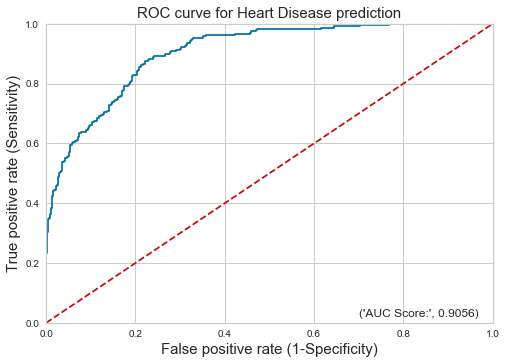

In [96]:
cat_model = CatBoostClassifier(silent=True , one_hot_max_size=2,loss_function='Logloss',eval_metric='AUC',boosting_type='Ordered', random_seed=25)
cat_model.fit(X_train, Y_train)
y_pred_cat = cat_model.predict(X_test)

print("F1 SCORE: CAT BOOST",f1_score(Y_test, y_pred_cat))
print("Cohen Kappa: CAT BOOST",cohen_kappa_score(Y_test, y_pred_cat))
print("CR Report: CAT BOOST \n",classification_report(Y_test, y_pred_cat))
print("Confusion Matrix: CAT BOOST \n",confusion_matrix(Y_test, y_pred_cat))
print("MCC: CAT BOOST",matthews_corrcoef(Y_test, y_pred_cat))
print("Accuracy: CAT BOOST",accuracy_score(Y_test, y_pred_cat))
print("Balanced Accuracy: CAT BOOST",balanced_accuracy_score(Y_test, y_pred_cat))
plot_roc(cat_model)